This is rough code that I tried to get to work. It tries to create a multi layer perceptron that can take in matrices of data. I struggled with this and was not able to get it functional to use on the assignment. The back propogation does not seem to work.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class AddGate:
  def __init__(self):
    self.x1 = 0
    self.x2 = 0

  def forward(self, x1, x2):
    self.x1 = x1
    self.x2 = x2

    return x1 + x2

  def backward(self, grad):
    return np.array([grad, grad])

In [ ]:
class AddGateMatrix:
  def __init__(self):
    self.x1 = 0

  def forward(self, x1):
    self.x1 = x1

    return x1.sum(axis=1)

  def backward(self, grad):
    return grad

In [ ]:
class MulGate:
  def __init__(self):
    self.x1 = np.array([0])
    self.x2 = np.array([0])

  def forward(self, x1, x2):
    # x1 is input
    # x2 is current weights
    self.x1 = x1
    self.x2 = x2

    return x1 * x2

  def backward(self, grad):
    print(f"x2: {self.x2}")
    print(f"grad to mul: {grad}")
    # print(f"grad * x2: {self.x2*grad.T}")
    print(f"x1: {self.x1}")
    # print(f"grad * x2: {self.x1*grad}")

    weightGradients = np.zeros(self.x2.shape)
    print("past weight gradients")

    inputGradients = np.zeros(self.x1.shape)
    print("past input gradients")
    weightMul = np.dot(np.ones(self.x2.shape[1]), self.x2.T)
    print("past weight mul gradients")

    print("shapes")
    print(f"grad: {grad.shape}")
    print(f"x1: {self.x1.shape}")
    print(f"x2: {self.x2.shape}")
    print(f"weightmul: {weightMul.shape}")

    it = np.nditer(self.x1, flags=['f_index'])
    for x in it:
      print(f"x1 * x : {self.x1 * x}")
      weightGradients[it.index] = grad * x
      #inputGradients[it.index] = weightMul[it.index] * x
    # First is

    inputGradients = np.dot(self.x2, grad)
    return inputGradients, weightGradients

In [ ]:
class Sigmoid:
  def __init__(self):
    self.x = 0
    self.f = lambda x: 1/(1 + np.exp(-x))

  def forward(self, x):
    self.x = x

    return self.f(x)

  def backward(self, grad):
    return self.f(self.x)*(1 - self.f(self.x))*grad

In [ ]:
class Relu:
  def __init__(self):
    self.x = 0
    self.f = lambda x: np.where(x >= 0.0, x, 0.0)

  def forward(self, x):
    self.x = x

    return self.f(x)

  def backward(self, grad):
    return np.where(grad < 0.0, grad, 1)

In [ ]:
class CELossGate:
  def __init__(self):
    self.y = np.array([0.0])
    self.yp = np.array([0.0])

  def forward(self, y, yp):
    self.y = np.array([y])
    self.yp = yp
    # print(f"self y in CE {self.y}")
    # step1 = np.log(yp)
    # print(f"step1: {step1}")
    # step2 = np.array([1 - y])
    # print(f"step2: {step2}")
    # step3 = np.log(1 - yp)
    # print(f"step3: {step3}")
    # step4 = step2 @ step3
    # print(f"step4: {step4}")
    # step5 = step1 - step4
    # print(f"step5: {step5}")
    # step6 = np.array([y]) @ step5
    # print(f"step6: {step6}")
    # step7 = -step6
    # print(f"step7: {step7}")

    return -(self.y@(np.log(self.yp) - ((1 - self.y)@np.log(1 - self.yp))))

  def backward( self, grad ):
    return -self.y/self.yp + (1 - self.y)/(1 - self.yp)

In [ ]:
class Neuron:
  def __init__(self):
    #self.loss = CELossGate()
    self.mul1 = MulGate()
    self.mul2 = MulGate()
    self.add1 = AddGate()
    self.sig1 = Sigmoid()

  def forward( self, x, w1, w2 ):
    m1 = self.mul1.forward(x[0], w1)
    m2 = self.mul2.forward(x[1], w2)
    a1 = self.add1.forward(m1, m2)
    s1 = self.sig1.forward(a1)
    #loss = self.loss.forward(y, s1)

    #return s1, loss
    return s1

  def backward( self, loss ):
    #gl = self.loss.backward(1)
    gs1 = self.sig1.backward(loss)
    ga1 = self.add1.backward(gs1)
    gm1 = self.mul1.backward(ga1[0])
    gm2 = self.mul2.backward(ga1[1])

    grad_w = np.array([gm1[1], gm2[1]])
    grad_x = np.array([gm1[0], gm2[0]])

    return grad_w, grad_x

In [ ]:
class Layer:
  def __init__(self, size, activation=Sigmoid):
    #self.loss = CELossGate()
    self.weights = np.random.randn(size[0], size[1])
    #self.weights = np.array([[1, 1], [2, 2]])
    self.mul1 = MulGate()
    self.mul2 = MulGate()
    self.add1 = AddGateMatrix()
    self.activ = activation()

    self.gradients = np.zeros((size[0], size[1]))

  def forward( self, x ):
    # Multiplies weight matrices by input matrices
    m = self.mul1.forward(x, self.weights)
    print(f"m: {m}")

    # Sums multiply result matrix along axis 1 to get neuron values
    a1 = self.add1.forward(m)
    print(f"add: {a1}")

    # Applies sigmoid function to neuron values to get activations
    #s1 = self.sig1.forward(a1)
    #loss = self.loss.forward(y, s1)

    s1 = self.activ.forward(a1)

    #return s1, loss
    return s1

  def backward( self, loss):
    #gl = self.loss.backward(1)
    #gs1 = self.sig1.backward(loss)
    gs1 = self.activ.backward(loss)
    print(f"gs1: {gs1}")
    ga1 = self.add1.backward(gs1)
    print(f"ga1: {ga1}")
    #inputGrad, weightsGrad = self.mul1.backward(ga1[1])
    inputGrad, weightsGrad = self.mul1.backward(ga1)
    print(f"output mul backward: {inputGrad} | {weightsGrad}")
    # print(f"inputGrad: {inputGrad}")
    # print(f"weightsGrad: {weightsGrad}")

    self.gradients += weightsGrad

    return inputGrad

  def updateWeights(self, learningRate):
    self.weights += -learningRate*self.gradients


In [ ]:
class MLPNetwork:
  # Work with a matrix
  # As it is a binary classification problem you need two output neurons
  # And a binary cross entropy loss function
  # Add relu

  def __init__(self):
    self.neuronModule1 = Neuron()
    self.neuronModule2 = Neuron()
    self.neuronModule3 = Neuron()

  def forward(self, x, w):
    p1 = self.neuronModule1.forward(x, w[0], w[1])
    p2 = self.neuronModule2.forward(x, w[2], w[3])
    p3 = self.neuronModule3.forward([p1, p2], w[4], w[5])

    return p3

  def backward(self, grad):

    g3w, g3x = self.neuronModule3.backward(grad) # Gradient of loss function * Gradient of Neuron 3 modules

    gw5 = g3w[0]
    gw6 = g3w[1]

    g2w, g2x = self.neuronModule2.backward(g3x[0])

    g1w, g1x = self.neuronModule1.backward(g3x[1])

    gw3 = g2w[0]
    gw4 = g2w[1]

    gw1 = g1w[0]
    gw2 = g1w[1]

    returnArray = np.array([gw1, gw2, gw3, gw4, gw5, gw6])

    #return np.array([gw1, gw2, gw3, gw4, gw5, gw6], [g1x[0], g1x[1], g2x[0], g2x[1], g3x[0], g3x[1]])
    return returnArray

In [ ]:
class MLPNetworkMatrix:
  # Work with a matrix
  # As it is a binary classification problem you need two output neurons
  # And a binary cross entropy loss function
  # Add relu

  def __init__(self, layers):
    self.layers = layers

  def forward(self, x):
    for layer in self.layers:
      x = layer.forward(x)

    return x

  def backward(self, grad):
    for layer in self.layers[::-1]:
      grad = layer.backward(grad)

  def updateWeights(self, learningRate):
    for layer in self.layers:
      layer.updateWeights(learningRate)

(2, 500)
(500,)


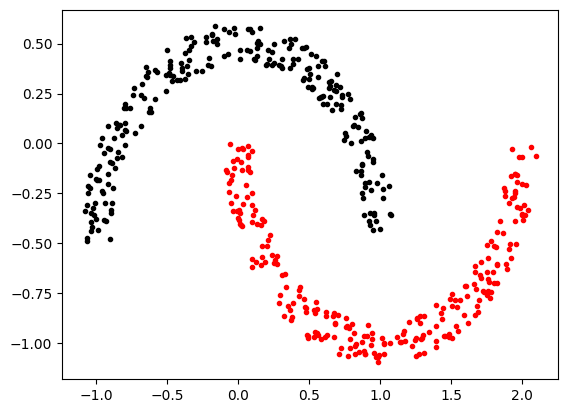

In [ ]:
moon1 = lambda r, theta: np.array([r*np.cos(theta), r*np.sin(theta) - 0.5])
moon2 = lambda r, theta: np.array([r*np.cos(theta) + 1, r*np.sin(theta)])

# Moon one
noise = 0.2
num_samples = 250
theta = np.random.rand(num_samples)*np.pi
radius = 1 + (np.random.rand(len(theta))-0.5)*noise
X1 = moon1(radius, theta)
Y1 = np.zeros(num_samples)
plt.plot(X1[0,:], X1[1,:], 'k.')

# Moon two
theta = -np.random.rand(num_samples)*np.pi
radius2 = 1 + (np.random.rand(len(theta))-0.5)*noise
X2 = moon2(radius2, theta)
Y2 = np.ones(num_samples)
plt.plot(X2[0,:], X2[1,:], 'r.')

X = np.hstack([X1, X2])
Y = np.hstack([Y1, Y2])

print(np.shape(X))
print(np.shape(Y))

# Shuffling
idxs = np.array(range(len(Y)))
np.random.shuffle(idxs)

X = X[:,idxs]
Y = Y[idxs]

In [ ]:
testData = np.array([1, 1.5, 3, 5])
print(testData)
w = np.array([[0.5, 0.4, 0.7], [0.3, -0.7, 0.1]])
print(w)

print(testData * w)
print(w.sum(axis=1))

[1.  1.5 3.  5. ]
[[ 0.5  0.4  0.7]
 [ 0.3 -0.7  0.1]]


ValueError: ignored

In [ ]:
layer1 = Layer((2, 4), Relu)
layer2 = Layer((1, 2))
l1 = layer1.forward(testData)
yp = layer2.forward(l1)
criterion = CELossGate()
print(f"yp: {yp}")
loss = criterion.forward(np.array([1]), yp)
print(f"loss: {loss}")
grad = criterion.backward(loss)
print(f"grad: {grad}")
l2grad = layer2.backward(grad)
print(f"l2grad, {l2grad}")
print(layer1.backward(l2grad, 0.001))
# Multiply gate backward needs work to function with matrices
# Product rule or something


m: [[-1.07818176 -1.93061777 -1.4096889   0.74341739]
 [ 1.41677086 -0.869942    1.27749184 -3.13562781]]
add: [-3.67507105 -1.31130711]
m: [[-0.  0.]]
add: [0.]
yp: [0.5]
loss: 0.6931471805599453
grad: [-2.]


TypeError: ignored

In [ ]:
testData = np.array([1, 2])

matrixNetwork = MLPNetworkMatrix((Layer((2, 2), Relu), Layer((1, 2))))

yp = matrixNetwork.forward(testData)
print(yp)

criterion = CELossGate()
loss = criterion.forward(np.array([1]), yp)
print(f"loss: {loss}")

grad = criterion.backward(loss)
print(f"grad: {grad}")

matrixNetwork.backward(grad)

matrixNetwork.updateWeights(0.001)

m: [[-0.93915349  1.06209796]
 [ 0.29788983  0.33590878]]
add: [0.12294448 0.63379862]
m: [[0.04774358 0.78912406]]
add: [0.83686763]
[0.69780509]
loss: [0.35981545]
grad: [[-1.43306492]]
gs1: [[-0.30219491]]
ga1: [[-0.30219491]]
x2: [[0.38833444 1.24507066]]
grad to mul: [[-0.30219491]]
x1: [0.12294448 0.63379862]
past weight gradients
past input gradients
past weight mul gradients
shapes
grad: (1, 1)
x1: (2,)
x2: (1, 2)
weightmul: (1,)
x1 * x : [0.01511534 0.07792204]
x1 * x : [0.07792204 0.40170069]


IndexError: ignored

In [ ]:
weights = np.array([[ 3.17614624, -0.35795799],
 [ 0.65787033,  0.5194006 ]])
input = np.array([ 1.0, 1.5])
grad = np.array([-0.06665721, -0.19201481])

print(weights * grad[0])
print(weights * grad[1])

[[-0.21171305  0.02386048]
 [-0.0438518  -0.03462179]]
[[-0.60986712  0.06873324]
 [-0.12632085 -0.09973261]]


In [ ]:
weights = np.array([[ 1.0, 1.0, 1.0],
 [ 0.65787033,  0.5194006, 1.0 ]])
input = np.array([ 1.0, 1.5])
grad = np.array([-0.06665721, -0.19201481])
gradients = np.zeros(input.shape)
print(gradients)
print(np.dot(np.ones((3)), weights.T))
gradients[0] = np.dot([1, 1, 1], weights)[0] * grad[0]
print(gradients)

[0. 0.]
[3.         2.17727093]


ValueError: ignored

In [ ]:
input = np.array([1, 1])
weights = np.array([[1, 1, 1, 1, 1], [2, 2, 2, 2, 2]])
gradients = np.array([1, 1, 1, 1, 1])

print(np.dot(weights, gradients))
print(np.dot(weights.T, gradients))

[ 5 10]


ValueError: ignored

In [ ]:
matrixNetwork = MLPNetworkMatrix((
    Layer((5, 2), Relu),
    Layer((1, 5))
  )
)

num_epochs = 10
eta = 0.001

criterion = CELossGate()

for i in range(num_epochs):
  loss = 0
  predictions = []
  # Iterate over the training set
  for j in range(500):
    yp = matrixNetwork.forward(X[:, j]) # Forward pass
    print(f"yp: {yp}")
    result = 0
    if(yp >= 0.5):
      result = 1
    else:
      result = 0
    predictions.append(result)
    print(f"y: {Y[j]}")
    ll = criterion.forward(np.array(Y[j]), yp)
    loss += ll
    grad = criterion.backward(ll)
    matrixNetwork.backward(grad) # Backward pass

  accuracy = (predictions == Y).sum()
  if(i % 500 == 0):
    print(f'Epoch {i} - loss: {loss / 500} | Accuracy: {accuracy / 500}')
    accuracy = 0.0

  matrixNetwork.updateWeights(eta)

print(w)
print(f'Training finished. Loss: {loss/ 500}')

m: [[ 1.42607542  0.60641432]
 [-1.4147305  -0.01555277]
 [-0.27786735  0.12678084]
 [ 0.49210416  0.45739446]
 [-1.07090642  0.26277398]]
add: [ 2.03248974 -1.43028327 -0.15108651  0.94949862 -0.80813244]
m: [[-1.06649562 -0.          0.          1.35347939 -0.        ]]
add: [0.28698376]
yp: [0.57125755]
y: 0.0
gs1: [0.57125755]
ga1: [0.57125755]
x2: [[-0.52472374 -0.7954793   0.20555085  1.42546746 -0.91958087]]
grad to mul: [0.57125755]
x1: [2.03248974 0.         0.         0.94949862 0.        ]
past weight gradients
past input gradients
past weight mul gradients
shapes
grad: (1,)
x1: (5,)
x2: (1, 5)
weightmul: (1,)
x1 * x : [4.13101455 0.         0.         1.9298462  0.        ]
x1 * x : [0. 0. 0. 0. 0.]


IndexError: ignored

In [ ]:
np.log(0.0)

<ipython-input-181-64f908b93ed3>:1: RuntimeWarning: divide by zero encountered in log
  np.log(0.0)


-inf

In [ ]:
w = np.random.rand(6)
myNetwork = MLPNetwork()
num_epochs = 5000
eta = 0.001

criterion = CELossGate()

for i in range(num_epochs):
  loss = 0
  grad_w = np.zeros(6)
  predictions = []
  # Iterate over the training set
  for j in range(500):
    yp = myNetwork.forward(X[:, j], w) # Forward pass
    result = 0
    if(yp >= 0.5):
      result = 1
    else:
      result = 0
    predictions.append(result)
    ll = criterion.forward(Y[j], yp)
    loss += ll
    grad = criterion.backward(ll)
    gw = myNetwork.backward(grad) # Backward pass
    grad_w += gw

  accuracy = (predictions == Y).sum()
  if(i % 500 == 0):
    print(f'Epoch {i} - loss: {loss / 500} | Accuracy: {accuracy / 500}')
    accuracy = 0.0

  w += -eta*grad_w

print(w)
print(f'Training finished. Loss: {loss/ 500}')

Epoch 0 - loss: 0.7064755709114744 | Accuracy: 0.5
Epoch 500 - loss: 0.6734582691866536 | Accuracy: 0.5
Epoch 1000 - loss: 0.6512563386285686 | Accuracy: 0.5
Epoch 1500 - loss: 0.6389165511548245 | Accuracy: 0.5
Epoch 2000 - loss: 0.6323711992747701 | Accuracy: 0.5
Epoch 2500 - loss: 0.6288609017145649 | Accuracy: 0.5
Epoch 3000 - loss: 0.6263559102970321 | Accuracy: 0.5
Epoch 3500 - loss: 0.6244928135834015 | Accuracy: 0.5
Epoch 4000 - loss: 0.6231956175750526 | Accuracy: 0.5
Epoch 4500 - loss: 0.6221393343641306 | Accuracy: 0.5
[ 2.49016459 -6.62008878  2.5718692  -6.83651484  0.530729    0.49709008]
Training finished. Loss: 310.60336196452437


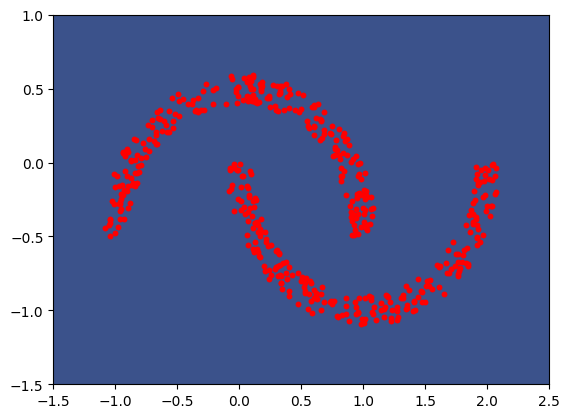

In [ ]:
xg = np.linspace(-1.5, 2.5, 500)
yg = np.linspace(-1.5, 1, 500)

predictions = []
for i in range(len(X)):
  result = 0
  yp = myNetwork.forward([xg[i], yg[i]], w) # Forward pass
  if(yp >= 0.5):
    result = 1
  else:
    result = 0

  predictions.append(result)

for i in range(len(predictions)):
  plt.plot(X[0, :], X[1, :], 'r.' if predictions[i] == 1 else 'k.')

xx, yy = np.meshgrid(xg, yg)
predictions = []
# Iterate over the training set
for i in range(len(xx)):
  for j in range(len(xx)):
    result = 0
    yp = myNetwork.forward([xx[i][j], yy[i][j]], w) # Forward pass
    if(yp >= 0.5):
      result = 1
    else:
      result = 0

    predictions.append(result)

plt.contourf(xx, yy, np.reshape(predictions, xx.shape))

In [ ]:
# Your code here

y_pred = model(x.T)

xvis = x.cpu()
yvis = y_pred.cpu()
predictions = np.argmax(yvis.numpy(), 1)

for i in range(len(predictions)):
  plt.plot(xg[0, i], yh[1,i], 'r.' if predictions[i] == 1 else 'k.')

xg = np.linspace(-1.5, 2.5, 500)
yg = np.linspace(-1.5, 1, 500)

xx, yy = np.meshgrid(xg, yg)

Data = torch.from_numpy(np.vstack([xx.flatten(), yy.flatten()])).float()
ypred = model(Data.T)
val, predictions = torch.max(ypred, 1)
Z = predictions.reshape(xx.shape)

plt.contourf(xx, yy, Z)